# Ultimate Data Analysis Challenge - 1

## Part - 1: EDA

In [1]:
# Loading all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Loading the Dataset in a DataFrame

In [2]:
df = pd.read_json('logins.json')

### 2. Exploring Data

In [3]:
# Checking the first 5 rows of the dataframe
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Checking the shape of the dataframe
df.shape

(93142, 1)

In [5]:
# Checking the summary statistics of the Dataframe
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
# Checking the data types contained in the Dataframe
df.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
# Checking for Null values
df.isnull().values.any()

False

The dataset only contains login times and the data is presented in date-time format. Also, there is no null value present in the dataset.

### 3. Lets aggregate the data in 15 min slots containing the login counts in each slot.

In [8]:
# Let's sort the dataframe
df.sort_values(by = 'login_time', inplace= True)

In [9]:
# Let's add a new column 'freq' in the dataframe
df['freq'] = 1

In [10]:
# Lets aggregate the data in 15 min interval
df = df.groupby(pd.Grouper(key = 'login_time', freq = '15T')).sum()

In [11]:
df.head(5)

,freq
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### 4. Lets plot the Time Series

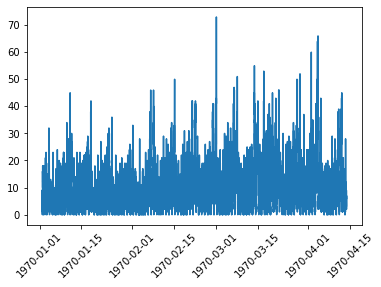

In [12]:
plt.plot(df)
plt.xticks(rotation = 45)
plt.show()

Things are not clear from this graph so lets resample the data on daily basis

In [13]:
df_daily = df.resample('D').sum()

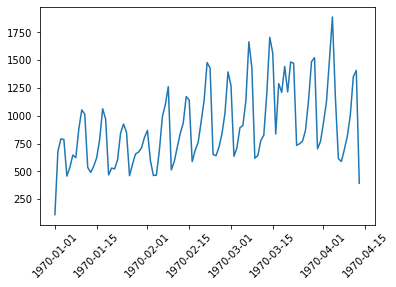

In [14]:
# Plot the daily trends
plt.plot(df_daily)
plt.xticks(rotation = 45)
plt.show()

As per the above Graph, it looks like:

1. There is a seasonality pattern in logins where in every 15 days there are 2 peaks in login counts.

2. Over the period of time, login count gradually increases.

Lets plot just 15 days data now

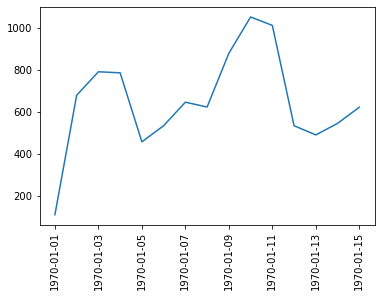

In [15]:
plt.plot(df_daily[:15])
plt.xticks(rotation = 90)
plt.show()

As per the above data, it can be seen that login counts increase after a difference of about 5-6 days. Thus, it looks like login counts increase on Weekends.

So, lets divide the data in weekday and weeekend to check the difference in login counts.

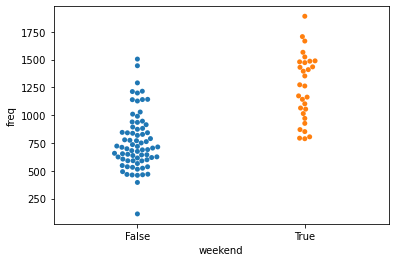

In [16]:
# Dividing the data in weekday and weekends
df_daily['weekend'] = df_daily.index.weekday >= 5
sns.swarmplot(x = 'weekend', y = 'freq', data = df_daily)
plt.show()

Hence, from the above swarm plot it is clear that on weekends the login count was infact higher.

## Part - 2: Experiment and Metric Design

### 1. Lets load the dataset and explore it

In [17]:
city = pd.read_json('ultimate_data_challenge.json')
city.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
# Checking the shape of the dataframe
city.shape

(50000, 12)

In [19]:
# Checking the Datatypes
city.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

Lets convert the signup_date and last_trip_date to datetime type

In [20]:
city['signup_date'] = pd.to_datetime(city['signup_date'])
city['last_trip_date'] = pd.to_datetime(city['last_trip_date'])
city.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [21]:
# Lets find the max and min dates for last_trip_date column
print(city['last_trip_date'].min(), ' to ', city['last_trip_date'].max())

2014-01-01 00:00:00  to  2014-07-01 00:00:00


We know that the data is from the users who signed up in January.

Also, from above we know that the latest user to take a trip was on 01-Jul-2014. Hence, we consider a user as retained if the user has taken any ride in last 30 days. So, we'll find all the users who have taken rides from 01-Jun-2014 and registered in Jauary.

In [22]:
city['retained'] = city['last_trip_date'] >= pd.to_datetime('2014-06-01')
city['retained'] = city['retained'].astype(int)

In [23]:
# Lets drop the columns 'last_trip_date' and 'signup_date' since we have the retained customers now.
city.drop(columns = ['last_trip_date', 'signup_date'], inplace = True)
city.head(5)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [24]:
# ultimate_black_user column contains boolean values hence converting those to 0-1.
city['ultimate_black_user'] = city['ultimate_black_user'].astype(int)
city.head(5)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [25]:
# Checking the summary statistics of the Dataframe
city.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,0.37708,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,0.48466,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000


In [26]:
city.isnull().sum()

city                         0
trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

In [27]:
# Lets fill the null values with the mean values
city.fillna(city.mean(), inplace=True)
city.isnull().sum()

city                        0
trips_in_first_30_days      0
avg_rating_of_driver        0
avg_surge                   0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
retained                    0
dtype: int64

In [28]:
# Since Phone is a categorical variable we can fill it with frequency
city['phone'].fillna(city['phone'].mode()[0], inplace = True)
city.isnull().sum()

city                      0
trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

Now, since all the null values have been taken care of, lets proceed with EDA.

### 2. EDA

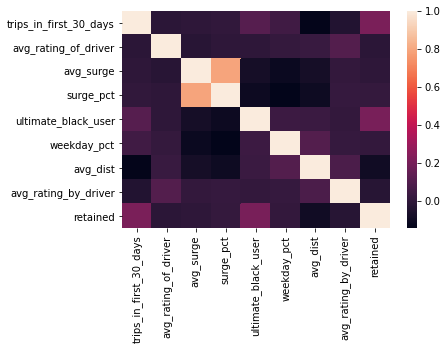

In [29]:
# Lets plot a heatmap to find correlations between retained and other variables
sns.heatmap(city.corr())
plt.show()

In [30]:
# Lets print the correlation values for retained as well
city.corr()['retained'].sort_values()

avg_dist                 -0.092780
avg_rating_by_driver     -0.026748
avg_rating_of_driver     -0.010829
avg_surge                -0.003333
weekday_pct               0.009693
surge_pct                 0.011797
ultimate_black_user       0.205002
trips_in_first_30_days    0.210463
retained                  1.000000
Name: retained, dtype: float64

Thus, it can be seen that trips_in_first_30_days and ultimate_black_user columns have a weak correation with retained column.

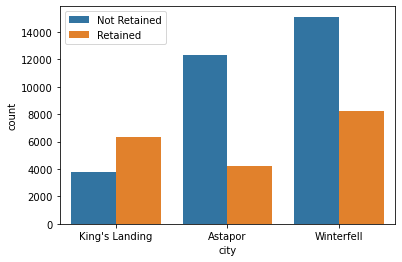

In [31]:
# Lets also plot City columns with retained
sns.countplot(x = 'city', hue = 'retained', data = city)
plt.legend(['Not Retained', 'Retained'])
plt.show()

As per the above graph it can be seen that Users from King's Landing are more likely to be retained than any other city.

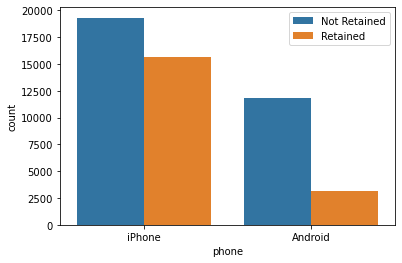

In [32]:
# Lets also  Phone columns with retained
sns.countplot(x = 'phone', hue = 'retained', data = city)
plt.legend(['Not Retained', 'Retained'])
plt.show()

As per the above Graph, it can be seen that users having an Iphone are more likely to be retained than Android users.

### 3. Preprocessing and Modelling

In [35]:
# Lets replace the categorical variables with dummy variables
city = pd.get_dummies(city, drop_first=True)
city.head(5)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,1,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,1,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,1,0


In [38]:
# Lets divide the data into train and test sets
from sklearn.model_selection import train_test_split
y = city['retained']
X = city.drop(columns=['retained'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

Lets create a Random Forrest Model using GridSearchCV for hyperparameter tuning

In [50]:
# importing the required packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

In [43]:
# Creating a model
param_grid = {'n_estimators':[100, 300, 500, 1000]}
model = RandomForestClassifier(max_depth = 4, n_jobs = -1, random_state=0)
model_cv = GridSearchCV(model, param_grid, cv = 5)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_jobs=-1,
                                              random_state=0),
             param_grid={'n_estimators': [100, 300, 500, 1000]})

In [44]:
# Lets print the Best score and Best parameters
print("Best Score:" + str(model_cv.best_score_))
print("Best Parameters: " + str(model_cv.best_params_))

Best Score:0.7566857142857143
Best Parameters: {'n_estimators': 500}


Hence, a random tree with 500 estimators is the best one. So lets create a final model on these parameters and then test it on our test set.

In [46]:
# Create a model with best parameters.
model = RandomForestClassifier(max_depth= 4, n_estimators = 500, random_state = 0, n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)

In [47]:
# Lets predict the results on our test set
y_pred = model.predict(X_test)

In [49]:
# Lets create a confusion matrix to check how may of our predictions were correct.
confusion_matrix(y_test, y_pred)

array([[8473,  913],
       [2731, 2883]], dtype=int64)

In [51]:
# Lets get the accuracy metric and f1-score as well
print("Accuracy ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy  0.7570666666666667
F1 Score:  0.7443243959999016
